In [1]:
import sys

print(sys.version)

3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]


# 4.  클래스 데코레이터

- 함수 대신 클래스에도 데코레이터 함수를 처리할 수 있다.
- 이때는 함수대신 클래스를 받도록 구성한다.

## 4.1 데코레이터로 속성 추가

### 데코레이터 처리 함수 정의 

In [1]:
def class_deco(cls):
    cls.deco = True
    return cls

### 클래스의 속성을 데코레이터에서 처리 

In [2]:
@class_deco
class A:
    pass

### 클래스 속성 확인 

In [3]:
A.deco

True

## 4.2 클래스에 메소드 추가 

- 데코레이터 함수로 클래스에 특정 함수를 추가할 수 있다. 



### 클래스 내의  함수 추가

- `__call__' 속성에 추가 함수 정의하면 객체를 실행할 수 있다.

- 메소드로 추가할 함수 정의하고 속성에 추가하면 메소드로 사용할 수 있다.


### 함수로만 사용할 경우 첫번째 매개변수에 self 미지정

In [7]:
def sum_(a, b):
    return a + b

### 메소드로 사용하려면 첫번째 매개변수에 self로 지정

In [8]:
def add_(self, a, b):
    return a + b

### 데코레이터 함수 정의

- 클래스를 받아서 데코레이터를 처리함
- 객체 실행할 것을 스태틱메소드로 할당
- 객체 메소드는 클래스에 함수로 할당
- 이 함수의 결과는 클래스이다.


In [9]:
def deco_1(cls):
    cls.__call__ = staticmethod(sum_)
    cls.add = add_
    return cls
# 얘네 기능을 아래의 두개의 클래스에 넣는다.

### 두 개의 클래스를 데코레이터 처리 

- 클래스에 데코레이터를 처리한다.
- 두 개의 클래스에는 아무런 메소드가 없지만 데코레이터를 통해 메소드가 추가된다.

In [11]:
# 데코1의 기능을 가져온다
@deco_1
class A:
    pass


@deco_1
class B:
    pass

### 클래스 네임스페이스 확인

In [12]:
A.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'A' objects>,
              '__weakref__': <attribute '__weakref__' of 'A' objects>,
              '__doc__': None,
              '__call__': <staticmethod at 0x7fd37ea73a00>,
              'add': <function __main__.add_(self, a, b)>})

In [13]:
B.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'B' objects>,
              '__weakref__': <attribute '__weakref__' of 'B' objects>,
              '__doc__': None,
              '__call__': <staticmethod at 0x7fd37ea73a30>,
              'add': <function __main__.add_(self, a, b)>})

### 객체를 만들어서 인스턴스 실행 및 메소드 실행 

In [10]:
a = A()

In [11]:
a(1, 2)

3

In [12]:
a.add(10,20)

30

In [13]:
b = B()

In [14]:
b('3', 'a')

'3a'

In [15]:
b.add(10,20)

30

## 4.3  immutable class만들기

- 특정 값을 변경하는 __setattr__ 메소드를 차단하면 변경 불가능한 객체만 만들어진다.


### 데코레이터 함수 정의 

- 점연산 갱신인 스페셜메소드를 예외가 발생하는 함수로 정의해서 차단함

### 점연산자
- 네임스페이스를 열어서 조회한다. (부모클래스, 객체클래스 전부 조회)
- <객체>.<이름> = (객체의 네임스페이스를 조회해서 <이름>의 속성을 갱신한다.(set연산)

In [18]:
class A :
    def __init__(self,x) :
        # self. : self의 namespace를 조회한다.
        # '=' : 속성을 갱신한다.
        self.x = x

In [20]:
b = A(1); b.__setattr__('y',100)

In [21]:
b.__dict__

{'x': 1, 'y': 100}

In [28]:
# getattribute : 도트연산자
b.__getattribute__('y')

100

In [29]:
dir(A)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

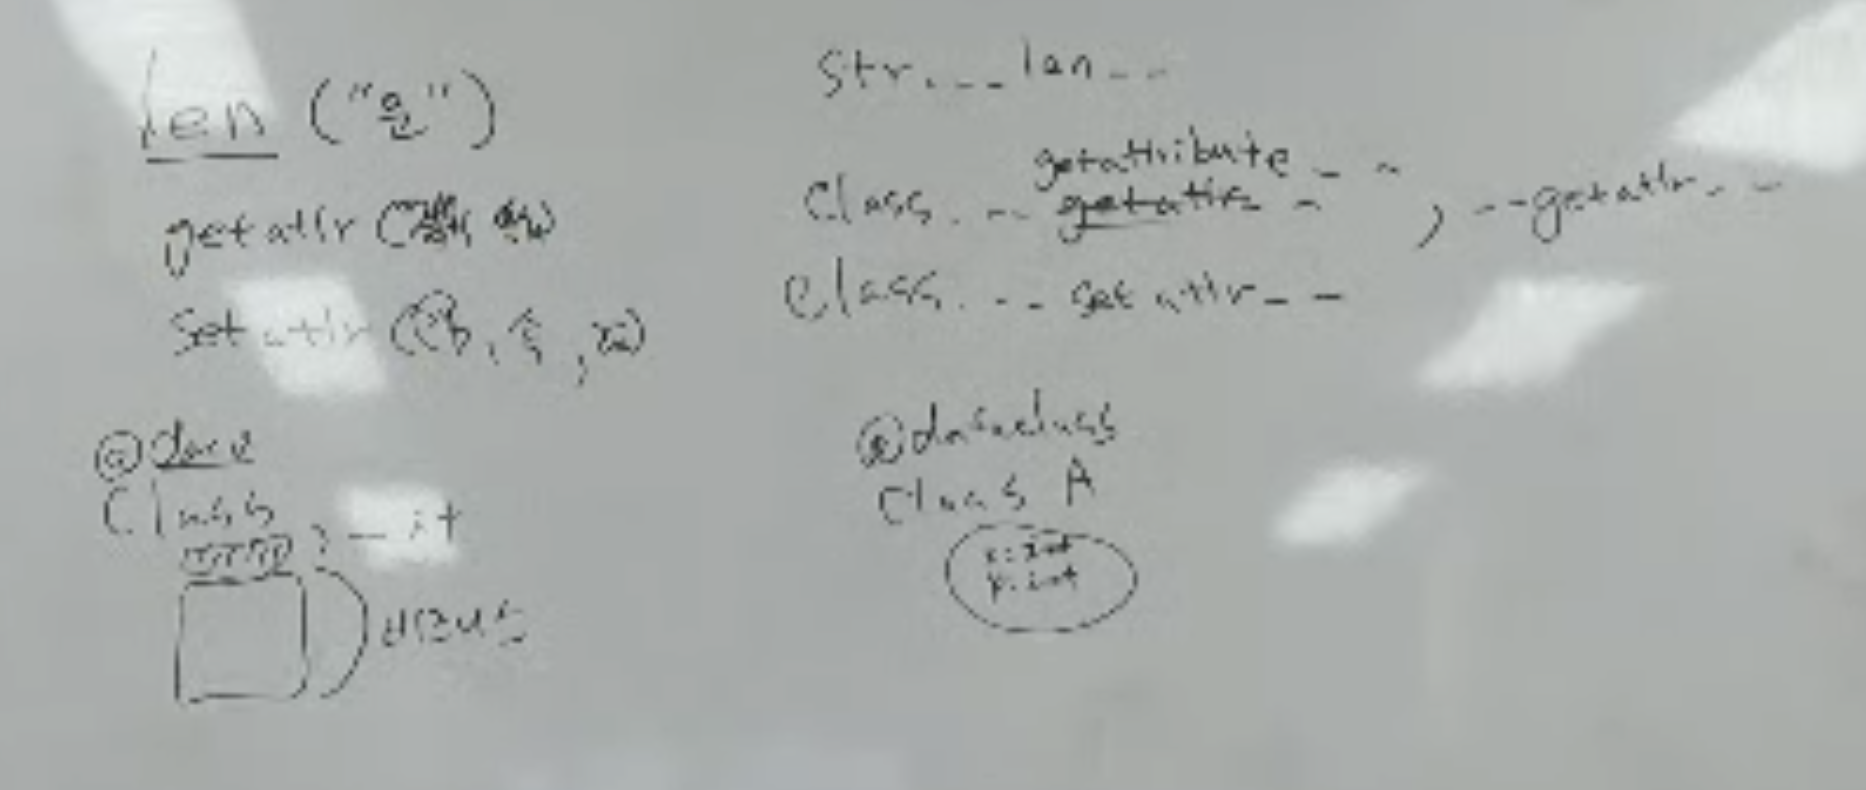

## 도트 연산자

- 객체. 하면 클래스가 조회되거나 object가 조회된다.
- 클래스. 하면 메타클래스가 조회된다.
- 도트 연산자도 재정의 가능하다

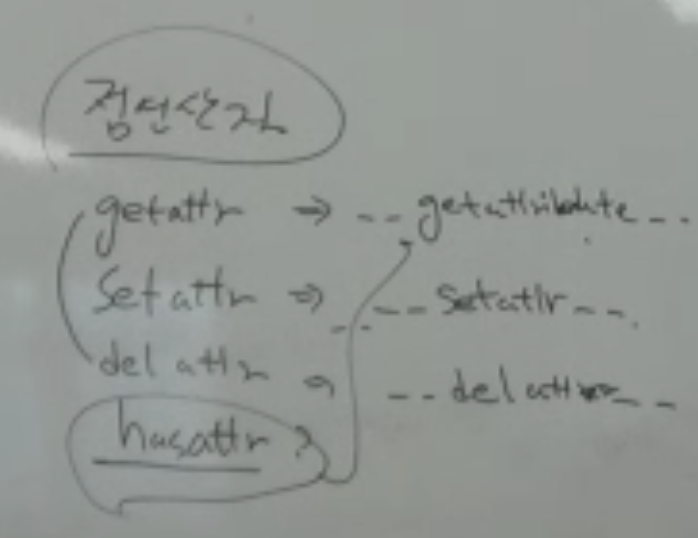

In [37]:
b.x

1

In [38]:
g = getattr(b,'x')

In [39]:
g

1

In [40]:
getattr(b,'x')

1

### 갱신 연산자도 재정의 가능

In [31]:
setattr(b,'z',999)

In [32]:
b.__dict__

{'x': 1, 'y': 100, 'z': 999}

In [44]:
# 메타클래스가 어떤걸 상속해주는지 확인한다. (메타클래스의 네임스페이스)
dir(type)

['__abstractmethods__',
 '__base__',
 '__bases__',
 '__basicsize__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dictoffset__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__flags__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancecheck__',
 '__itemsize__',
 '__le__',
 '__lt__',
 '__module__',
 '__mro__',
 '__name__',
 '__ne__',
 '__new__',
 '__prepare__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasscheck__',
 '__subclasses__',
 '__subclasshook__',
 '__text_signature__',
 '__weakrefoffset__',
 'mro']

In [16]:
def immutable(cls):
    def new_setattr(self, name, value):
        raise AttributeError("not set attribute ")
    cls.__setattr__ = new_setattr
    return cls

### 클래스 속성만 가진 클래스 정의 

- 클래스 속성만 정의한 클래스를 데코레이터 처리


In [17]:
@immutable
class A:
    a = 3
    b = 4

### 객체를 만들어서 조회 

In [18]:
a = A()

In [19]:
a.a, a.b

(3, 4)

### 속성을 갱신하면 예외를 발생 

In [20]:
try :
    a.a = 10
    a.a
except Exception as e :
    print(e)

not set attribute 


# 5.  인스턴스로 데코레이터 하기

- 인스턴스를 호출하는 부분을 데코레이터로 처리할 수 있다.

### 속성 상속
- 객체에서 속성을 상속할 때, 값을 찾기 위해 상위 클래스로 올라가며 최상위 클래스까지 올라간다.
- 디스크립터 클래스로 객체화 시킨 속성부터 상속한다. ( 디스크립터화 되어있어서 객체가 만든 속성이 있더라도 디스크립터 클래스의 속성을 먼저 상속한다 )

### instance 데코레이터

기능 : 시작전 알림 출력 print

```
deco = InstanceDeco("메세지")

@deco
def func():
    pass
    
func() # "메세지" 출력
```

In [5]:
from functools import wraps

### 인스턴스 데코레이터를 하려면 인스턴스가 실행이 되어야 함 

- 인스턴스를 가지고 데코레이터를 만들때는 스페셜 메소드 내부에 내부 함수를 지정해서 처리함


In [78]:
from functools import wraps

In [83]:
def outer(func):
    print("데코")
    # 함수에 대한 메타정보를 강제로 변경시켜주는 것 (정보유실)
    # 함수에 어떤 정보가 있는지 알려준다.
    # 메타 : 메타 + 데이터 = 데이터의 데이터 / 사용할 데이터의 추가정보
    # 메타 + 클래스 = 클래스의 클래스. 즉, metaclass = type 
    @wraps(func)
    def inner(*args, **kwargs):
        print("데코2")
        return func(*args, **kwargs)
    inner.__name__ = func.__name__
    return inner

In [84]:
@outer
def add(x,y) :
    return x + y  

데코


In [85]:
add.__name__

'add'

In [86]:
add(100, 200)

데코2


300

In [6]:
class InstanceDeco:
    def __init__(self, value):
        self.value = value # __closure__
        
    # 클래스 내에 __call__ 은 객체를 실행한다.
    def __call__(self, func):
        # 
        @wraps(func)
        def inner(*args, **kwargs):
            # 내부함수는 외부함수의 변수를 참조할 수 있다.
            print(self.value)
            return func(*args, **kwargs)
        return inner

### 인스턴스 생성 및 데코레이터 처리

In [7]:
deco = InstanceDeco("@@@@")

In [8]:
@deco
def func():
    pass

func()

@@@@


In [9]:
func.__name__

'func'

# 6.  class로  데코레이터 처리하기

기능 : 시작전 알림 출력 print

```

@ClassDeco
def func():
    pass
    
func() # 알림 출력
```

추가 기능 : + wraps 적용

In [90]:
def sub(x,y) :
    return x - y

In [97]:
# get = 이름으로 속성을 읽어오는 것.
sub.__get__

<method-wrapper '__get__' of function object at 0x7f8e3d30a310>

In [94]:
sub(40,20)

20

In [271]:
def bbb(self):
    return self._aaa

In [283]:
def aaa(self,value):
    self.value = value

In [304]:
class AAA :
    @property
    def aaa(self):
        print(" getter call ")
        return self._aaa
    
    # aaa의 setter속성을 _aaa로 만든다.
    @aaa.setter
    def aaa(self,value):
        print(" setter call ")
        self._aaa = value
        
    # 값 초기화 시키는 메소드 (__init__)
    # 관행상 init, new가 클래스 맨위에 정의하는게 보기가 편하다.
    def __init__(self, aaa):
        # aaa의 값을 초기화 시킨다.
        self.aaa = aaa
        
    # 디스크립터, 클래스메소드
    # 이 메소드의 이름이 위의 메소드들과 겹치면 값이 뭉개진다.
    @classmethod    
    def aaa_(self) :
        return " method call "

In [305]:
AAA.__dict__

mappingproxy({'__module__': '__main__',
              'aaa': <property at 0x7f8e3d3a0720>,
              '__init__': <function __main__.AAA.__init__(self, aaa)>,
              'aaa_': <classmethod at 0x7f8e3d385e80>,
              '__dict__': <attribute '__dict__' of 'AAA' objects>,
              '__weakref__': <attribute '__weakref__' of 'AAA' objects>,
              '__doc__': None})

In [306]:
a = AAA("객체속성")

 setter call 


In [307]:
a.aaa

 getter call 


'객체속성'

In [308]:
a.__dict__

{'_aaa': '객체속성'}

### 클래스 생성할 때 인자로 함수를 받으므로 새로운 객체를  만들고 그 안에 함수를 저장해서 처리

In [316]:
from functools import wraps

In [317]:
class ClassDeco:
    # 객체 생성할 때, 
    def __new__(cls, *args, **kwargs):
        func = args[0]
        instance = super().__new__(cls)
        return wraps(func)(instance)
    
    def __init__(self, func):
        self.func = func # __closure__ / 저장 in __dict__
        
    
    ## 인스턴스 호출
    def __call__(self, *args, **kwargs):
        print("알림")
#         @wraps(self.func)
#         def inner()
        return self.func(*args, **kwargs)

### `__new__` 내부에 있는 함수를 객체내에 포함하기

In [318]:
def funcX():
    print("wrapped FUNC")

### wraps 함수가 부분 함수이므로 함수를 받아서 처리하고 객체의 인스턴스가 주어지면 이를 받아서 객체로 처리

In [319]:
wraps(funcX)

functools.partial(<function update_wrapper at 0x7f8e3a0cbaf0>, wrapped=<function funcX at 0x7f8e3d370a60>, assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'), updated=('__dict__',))

In [320]:
# 랩스를 두번 하는건 두 객체의 메타정보가 다를때
# 함수일 때는 메타정보가 동일하기 때문에 래핑을 한번만 해도 된다.
# 하지만 인스턴스일 땐 메타정보가 동일하지 않아서 두번 래핑을 해준다.
# 함수, 인스턴스, 메소드는 유사하다. 클래스를 객체로 만드려면 정보가 두개가 필요하다.
aaa = wraps(funcX)(ClassDeco(funcX))

### 객체 내부의 정보가 변경됨 

In [321]:
aaa.__dict__

{'__module__': '__main__',
 '__name__': 'funcX',
 '__qualname__': 'funcX',
 '__doc__': None,
 '__annotations__': {},
 '__wrapped__': <function __main__.funcX()>,
 'func': <function __main__.funcX()>}

### 인스턴스 내에 저장된 함수가 실행됨

- 실행함수를 클래스로 데코레이터 처리하기

In [322]:
# func = ClassDeco(func)

@ClassDeco
def func():
    print("ORIGIN FUNC")

In [323]:
func()

알림
ORIGIN FUNC


In [324]:
type(func)

__main__.ClassDeco

In [325]:
func.__name__

'func'

# 7. 내장 데코레이터

### lru_cache 를 이용해서 재귀작업에 대한 정보를 보관해서 빨리 처리 

### 재귀호출로만 처리 

In [36]:
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

In [37]:
%%time
fib(35)

CPU times: user 3.8 s, sys: 25.7 ms, total: 3.83 s
Wall time: 3.88 s


9227465

### 기존 값을 내부 딕셔너리에 저장

In [38]:
def memo(func):
    m = {}
    def inner(n):
        if not m.get(n):
            m[n] = func(n)
        return m[n]
    return inner

In [39]:
@memo
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

In [40]:
%%time
fib(35)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 32.2 µs


9227465

###  내부의 메모를 처리할 수 있도록 처리
- 계산하면 자동으로 저장하고 작성한다.

In [331]:
# lru : Least-recently-used (최근 사용한 것 계산)
# 팩토리얼에서 10을 계산했는데, 나중에 5를 계산하려고하면 lru_cache에 저장된 데이터를 가져옴으로써 계산시간을 줄인다.
from functools import lru_cache

In [327]:
@lru_cache()
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

In [328]:
%%time
fib(35)

CPU times: user 17 µs, sys: 9 µs, total: 26 µs
Wall time: 28.1 µs


9227465

In [329]:
help(lru_cache)

Help on function lru_cache in module functools:

lru_cache(maxsize=128, typed=False)
    Least-recently-used cache decorator.
    
    If *maxsize* is set to None, the LRU features are disabled and the cache
    can grow without bound.
    
    If *typed* is True, arguments of different types will be cached separately.
    For example, f(3.0) and f(3) will be treated as distinct calls with
    distinct results.
    
    Arguments to the cached function must be hashable.
    
    View the cache statistics named tuple (hits, misses, maxsize, currsize)
    with f.cache_info().  Clear the cache and statistics with f.cache_clear().
    Access the underlying function with f.__wrapped__.
    
    See:  http://en.wikipedia.org/wiki/Cache_replacement_policies#Least_recently_used_(LRU)



# 8. singledispatch

- 함수 매개변수의 타입에 따라 처리하는 함수 만들기
- 제너릭 프로그램 만들기

### 하나의 함수에 여러가지 타입을 받아서 다양한 함수를 처리할 수 있음

In [45]:
from functools import singledispatch

In [46]:
help(singledispatch)

Help on function singledispatch in module functools:

singledispatch(func)
    Single-dispatch generic function decorator.
    
    Transforms a function into a generic function, which can have different
    behaviours depending upon the type of its first argument. The decorated
    function acts as the default implementation, and additional
    implementations can be registered using the register() attribute of the
    generic function.



### 함수를 별도로  등록해서 처리 

In [47]:
@singledispatch
def func(arg):
    print("3배 증가")
    print(arg * 3)

In [48]:
func.register

<function functools.singledispatch.<locals>.register(cls, func=None)>

### 타입이 등록된 것 별로 처리 

In [49]:
@func.register(int)
def func_int(arg):
    print("정수가 3배 커집니다.")
    print(arg * 3)

    
@func.register(str)
def func_str(arg):
    print("문자열이 3번 반복됩니다.")
    print(arg * 3)

### 리스트를 넣으면 첫번째 함수를 호출

In [50]:
func([1, 2, 3])

3배 증가
[1, 2, 3, 1, 2, 3, 1, 2, 3]


### 정수를 넣으면 정수로 등록된 함수를 호출 

In [51]:
func(123)

정수가 3배 커집니다.
369


### 문자열을 넣으면 문자열로 등록된 함수를 호출 

In [52]:
func('abcd')

문자열이 3번 반복됩니다.
abcdabcdabcd


### 실제 정수를 호출하지만 타입 체크를 하지 않아 문자도 처리됨 

In [53]:
func.dispatch(int)('asdfasdf')

정수가 3배 커집니다.
asdfasdfasdfasdfasdfasdf
